In [59]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sb\

    

plt.rcParams['figure.figsize'] = (5.0, 2.0)

In [60]:
# Pima Indians Diabetes 

df = pd.read_csv("/Users/jj/PycharmProjects/springboard2/capstone_project_2/data/diabetes.csv", sep=",")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [61]:
# 
df.shape

(768, 9)

In [62]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
# number of Outcome
df.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114d21b70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1151ed4e0>]], dtype=object)

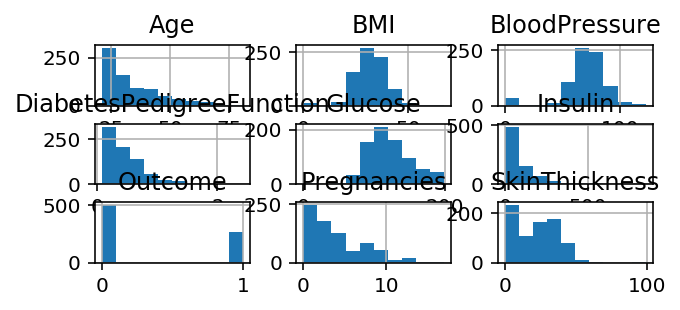

In [64]:
df.hist()

In [91]:
# x = df.columns[0: len(df.columns)-1]
x = df

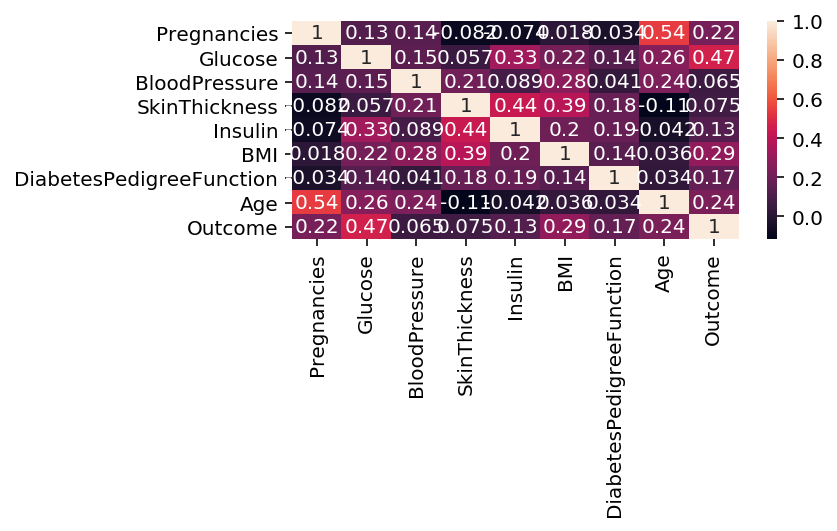

In [92]:
corr = df[df.columns].corr()
sb.heatmap(corr, annot=True)

# Feature Selection methods comparison on Pima Indian datasets


### Univariate Selection


In [144]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x1 = df.iloc[:, :-1]
y1 = df.iloc[:, 8]

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit1 = test.fit(x1, y1)

# summarize scores
np.set_printoptions(precision=3)
scores = fit1.scores_
score_summary_df = pd.DataFrame([scores], columns=x1.columns)
score_summary_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,111.519691,1411.887041,17.605373,53.10804,2175.565273,127.669343,5.392682,181.303689


In [145]:
# Looks like Glucose, Insulin, BMI, Age is the key features.

features = fit.transform(x1)
features_df = pd.DataFrame(features, columns=['Glucose', 'Insulin', 'BMI', 'Age'])
features_df

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0
5,116.0,0.0,25.6,30.0
6,78.0,88.0,31.0,26.0
7,115.0,0.0,35.3,29.0
8,197.0,543.0,30.5,53.0
9,125.0,0.0,0.0,54.0


### Recursive Feature Elimination


In [154]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

x2 = df.iloc[:, :-1]
y2 = df.iloc[:, 8]

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit2 = rfe.fit(x2.values, y2.values)

print("Num Features: %d" % fit2.n_features_)
print("Selected Features: %s" % fit2.support_)
print("Feature Ranking: %s" % fit2.ranking_)

rfe_feature_df = pd.DataFrame([fit2.support_, fit2.ranking_], columns=x2.columns)
rfe_feature_df

# Features

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,True,False,False,False,False,True,True,False
1,1,2,3,5,6,1,1,4


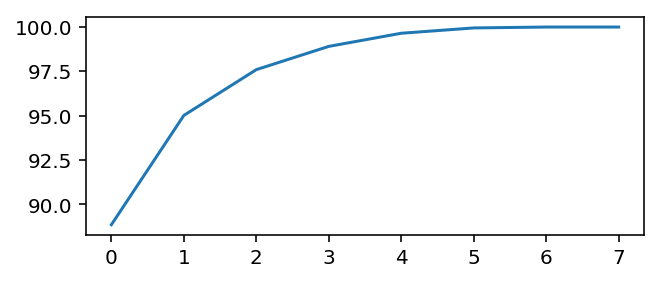

In [108]:
x = df.iloc[:, :-1]
y = df.Outcome

pca = PCA()
pca.fit_transform(x.values)
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)
plt.plot(var)
plt.show()

In [109]:
pca_ = PCA(n_components=3)

y_sklearn = pca_.fit_transform(x.values)

print(pca_.explained_variance_)
print(pca_.explained_variance_ratio_)
print(pca_.components_)

[ 13456.57298102    932.76013231    390.57783115]
[ 0.88854663  0.06159078  0.02579012]
[[ -2.02176587e-03   9.78115765e-02   1.60930503e-02   6.07566861e-02
    9.93110844e-01   1.40108085e-02   5.37167919e-04  -3.56474430e-03]
 [ -2.26488861e-02  -9.72210040e-01  -1.41909330e-01   5.78614699e-02
    9.46266913e-02  -4.69729766e-02  -8.16804621e-04  -1.40168181e-01]
 [ -2.24649003e-02   1.43428710e-01  -9.22467192e-01  -3.07013055e-01
    2.09773019e-02  -1.32444542e-01  -6.39983017e-04  -1.25454310e-01]]


In [110]:
pca_ = PCA(n_components=3)

fit = pca_.fit(x.values)
print(fit.components_)

[[ -2.02176587e-03   9.78115765e-02   1.60930503e-02   6.07566861e-02
    9.93110844e-01   1.40108085e-02   5.37167919e-04  -3.56474430e-03]
 [ -2.26488861e-02  -9.72210040e-01  -1.41909330e-01   5.78614699e-02
    9.46266913e-02  -4.69729766e-02  -8.16804621e-04  -1.40168181e-01]
 [ -2.24649003e-02   1.43428710e-01  -9.22467192e-01  -3.07013055e-01
    2.09773019e-02  -1.32444542e-01  -6.39983017e-04  -1.25454310e-01]]


In [95]:
scaled_df = pd.DataFrame(preprocessing.scale(x), columns=x.columns)
scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346


In [96]:
pd.DataFrame(pca_.components_, columns=scaled_df.columns, index=['PC-1', 'PC-2'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PC-1,-0.002022,0.097812,0.016093,0.060757,0.993111,0.014011,0.000537,-0.003565
PC-2,-0.022649,-0.972210,-0.141909,0.057861,0.094627,-0.046973,-0.000817,-0.140168


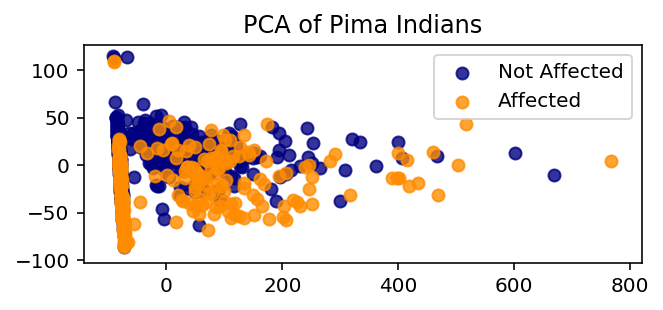

In [104]:
target_names = ['Not Affected', 'Affected']
colors = ['navy', 'darkorange']
lw = 1
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(y_sklearn[y == i, 0], y_sklearn[y==i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Pima Indians')
plt.figure()
plt.show()


In [98]:
# Feature Extraction

